In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


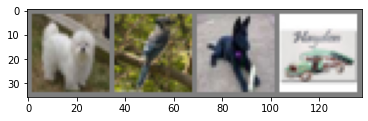

  dog  bird   dog truck


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))
            
print('Finished Training')

Accuracy of the network on the 10000 test images: 8 %
[1,  2000] loss: 2.288
[1,  4000] loss: 1.969
[1,  6000] loss: 1.711
[1,  8000] loss: 1.569
[1, 10000] loss: 1.520
[1, 12000] loss: 1.476
Accuracy of the network on the 10000 test images: 47 %
[2,  2000] loss: 1.427
[2,  4000] loss: 1.386
[2,  6000] loss: 1.358
[2,  8000] loss: 1.340
[2, 10000] loss: 1.325
[2, 12000] loss: 1.296
Accuracy of the network on the 10000 test images: 54 %
[3,  2000] loss: 1.243
[3,  4000] loss: 1.262
[3,  6000] loss: 1.232
[3,  8000] loss: 1.246
[3, 10000] loss: 1.211
[3, 12000] loss: 1.191
Accuracy of the network on the 10000 test images: 58 %
[4,  2000] loss: 1.144
[4,  4000] loss: 1.153
[4,  6000] loss: 1.153
[4,  8000] loss: 1.145
[4, 10000] loss: 1.120
[4, 12000] loss: 1.133
Accuracy of the network on the 10000 test images: 59 %
[5,  2000] loss: 1.055
[5,  4000] loss: 1.075
[5,  6000] loss: 1.081
[5,  8000] loss: 1.061
[5, 10000] loss: 1.080
[5, 12000] loss: 1.087
Accuracy of the network on the 10000

In [7]:
outputs = net(inputs)
loss = criterion(outputs, labels)
loss.backward()

In [8]:
print(inputs.grad)

None


In [9]:
grads = []
for param in net.parameters():
    grads.append(param.grad.view(-1))

In [10]:
paras = []
for param in net.parameters():
    paras.append(param.view(-1))

In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

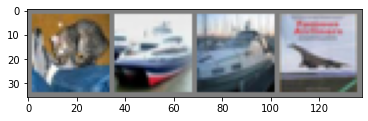

GroundTruth:    cat  ship  ship plane


In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship plane plane


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 74 %
Accuracy of  bird : 51 %
Accuracy of   cat : 28 %
Accuracy of  deer : 41 %
Accuracy of   dog : 68 %
Accuracy of  frog : 70 %
Accuracy of horse : 74 %
Accuracy of  ship : 63 %
Accuracy of truck : 69 %


In [18]:
from scipy import stats
import pickle

paras = list()
dists = list()
for param in net.parameters():
    paras.append((param.view(-1)).detach().numpy())
    weights = np.squeeze(paras[-1].flatten())
    dists.append(stats.gaussian_kde(weights))
    
pickle.dump( dists, open( "dists.pkl", "wb" ) )

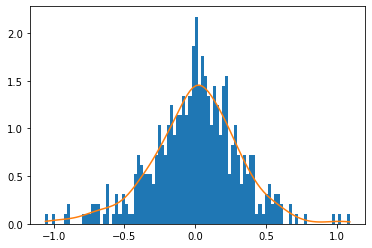

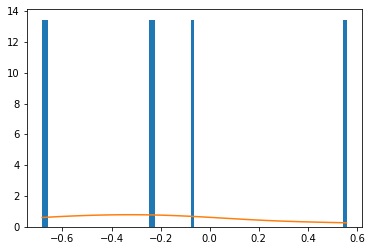

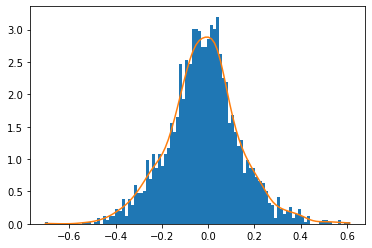

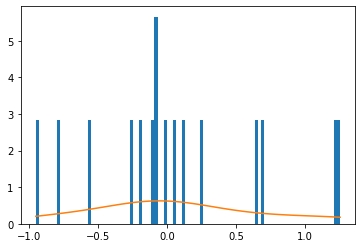

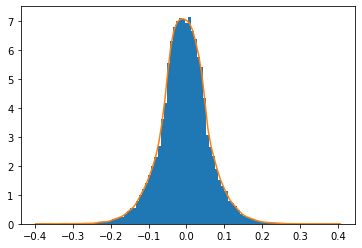

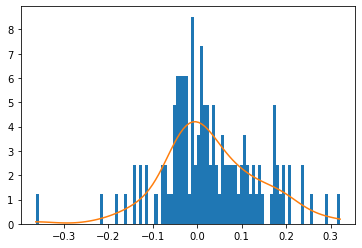

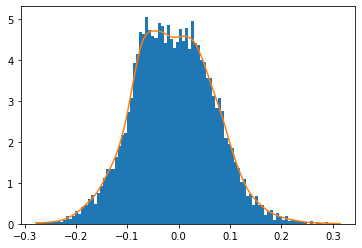

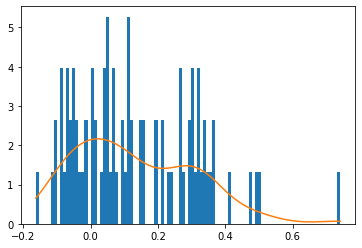

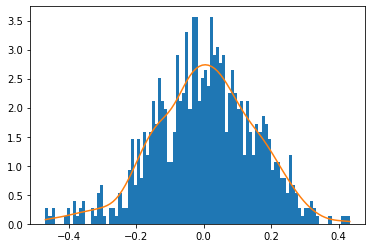

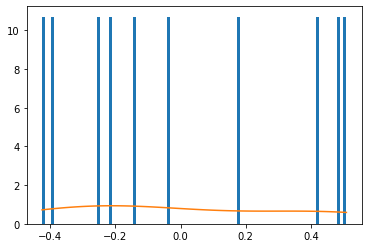

In [19]:
for p, d in zip(paras, dists):
    x_plot = np.linspace(p.min(), p.max(), 100, endpoint=True)
    plt.figure()
    plt.hist(p, bins=100, density=True)
    plt.plot(x_plot, d.pdf(x_plot))
    plt.show()